In [208]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import seaborn as sns

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [209]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [210]:
# Your script for 1.a) here

data_frame1 = pd.read_csv(url1, header=[0])

data_frame2 = pd.read_csv(url2, header=[0])



**b)** Print/show in notebook first 5 rows of both dataframes. 

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [211]:
# Script here

print("Data from shipdata1_2021.csv" )
data_frame1.head()


Data from shipdata1_2021.csv


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.2,21.6
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0


In [212]:
print("Data from shipdata2_2021.csv" )

data_frame2.head()

Data from shipdata2_2021.csv


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,"11,3631","74,6552",Porvoo,Tanker,30641,195,"32,24"
1,636016752,"11,7","74,6",Porvoo,Tanker,3853,"92,9","15,3"
2,244870429,"11,7126","69,5662",Porvoo,Tanker,7251,115,"18,6"
3,305653000,"10,8253","56,4266",Porvoo,Cargo,6668,"107,03","18,42"
4,235060255,"11,7311","80,9",Primorsk,Tanker,23353,"184,0","27,7"


**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [213]:
# Script here
#############
vessel = data_frame1[data_frame1['MMSI']== 231844000]

gt = vessel['Gross_tonnage']
print("gross tonnage: ",gt)
l = vessel['Length']
print( "length: ",l)
b = vessel['Breadth']
print("breadth: ", b)


gross tonnage:  49    2876
Name: Gross_tonnage, dtype: int64
length:  49    88.9
Name: Length, dtype: float64
breadth:  49    13.2
Name: Breadth, dtype: float64


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

<font color = red> \*** Answer here ***

We can observe that in dataset1 the decimal values are marked by ¨.¨, while in dataset2 the values are marked by ¨,¨.

**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [214]:
dataframe2_rpl = pd.read_csv(url2, decimal=',',header=[0])



**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [215]:
# Script here

dataframe2_rpl.head() #head function automatically prints the first 5 rows

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.00,32.24
1,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.90,15.30
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115.00,18.60
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9000,Primorsk,Tanker,23353,184.00,27.70


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [216]:
# Script here
df1=data_frame1.assign(Origin = 1)
df2=dataframe2_rpl.assign(Origin = 2)


**b)** Combine the two separate dataframes as one new dataframe.

In [217]:
# Script here
frames = [df1, df2]
  
result = pd.concat(frames)
result=result.reset_index(drop=True)
display(result)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.90,15.30,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00,1
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.20,21.90,1
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.20,21.60,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00,1
...,...,...,...,...,...,...,...,...,...
131,273374820,10.0000,74.6000,Vysotsk,NaN,4979,1399.00,16.70,2
132,273385070,9.4000,74.5000,Vysotsk,Tanker,4979,139.90,16.90,2
133,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.90,16.90,2
134,636092755,11.2000,73.7000,Vysotsk,Tanker,23240,183.00,27.40,2


**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [218]:
# Script here
df_sub = result.sample(n=6, random_state=6)
print(df_sub)

          MMSI    Speed      COG    Destination Ship_type  Gross_tonnage  \
58   244092000  14.6805  79.2000         Porvoo    Tanker           7833   
65   538002774  11.5935  67.3823         Porvoo    Tanker          30641   
95   249997000   9.2103  89.6131       Ust-Luga    Tanker          60751   
54   219178000  11.7699  73.3348         Porvoo    Tanker           7636   
34   244790509   7.7000  74.5000          Muuga     Cargo           3603   
112  245739000   8.9000  75.2000  Valko-Loviisa     Cargo           1978   

     Length  Breadth  Origin  
58    117.8     18.6       1  
65    195.0     32.2       1  
95    255.9     44.0       2  
54    129.8     19.9       1  
34    101.2     14.4       1  
112    80.0     12.2       2  


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [219]:
# Script here
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


<font color = red> \*** Answer here *** </font>
The used function gave us summary of the dataframe. We can read the index dtype and column dtypes, non-null values and memory usage.

__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [220]:
# Script here
result.isnull()



,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
131,False,False,False,False,True,False,False,False,False
132,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False


**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [221]:
# Script here
duplicate = result[result.duplicated('MMSI')]

print("Duplicate vessel values :")
print(duplicate)


Duplicate vessel values :
         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
69  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
70  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   

    Breadth  Origin  
69    32.24       2  
70    15.30       2  


**c)** Resolve missing data and remove duplicate data.

In [222]:
# Script here

# Script here
result.dropna() #resolve missing data
result.drop_duplicates(subset ="MMSI", keep = False, inplace = True)#remove duplicates
result=result.reset_index(drop=True)


**d)** Print out proof that there are no more missing or duplicate data

In [223]:
# Script here
print(result.isnull().values.sum())#function to check for missinv values
print(result.duplicated('MMSI').sum())
result.head(134)


1
0


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.90,15.30,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00,1
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.20,21.90,1
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.20,21.60,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00,1
...,...,...,...,...,...,...,...,...,...
127,273374820,10.0000,74.6000,Vysotsk,NaN,4979,1399.00,16.70,2
128,273385070,9.4000,74.5000,Vysotsk,Tanker,4979,139.90,16.90,2
129,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.90,16.90,2
130,636092755,11.2000,73.7000,Vysotsk,Tanker,23240,183.00,27.40,2


____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [224]:
# Script here
result['MMSI'] = result['MMSI'].astype(str)
print(result['MMSI'].dtypes)
print("\n After the change:\n",result.dtypes)


object

 After the change:
 MMSI              object
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [225]:
# Script here
result.describe()

,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,10.436667,78.326411,13479.053030,136.559470,20.132424,1.492424
std,1.965614,15.845129,18494.123564,124.821246,9.954783,0.501847
min,5.500000,53.326400,100.000000,15.000000,5.000000,1.000000
25%,8.936525,70.771450,2543.000000,88.750000,12.875000,1.000000
50%,10.200000,74.900000,5348.500000,115.000000,16.900000,1.000000
75%,11.717225,81.486900,15408.750000,160.250000,24.160000,2.000000
max,17.082500,157.267300,81502.000000,1399.000000,48.040000,2.000000


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [226]:
# Script here


<font color = red> \*** Answer here ***

**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [227]:
# Script here
print("Breadth: ")
(result["Breadth"].describe()).loc[["mean","std","max"]]


Breadth: 


mean    20.132424
std      9.954783
max     48.040000
Name: Breadth, dtype: float64

In [228]:
print("COG: ")
(result["COG"].describe()).loc[["mean","std","max"]]


COG: 


mean     78.326411
std      15.845129
max     157.267300
Name: COG, dtype: float64

In [229]:
print("Gross_tonnage: ")
(result["Gross_tonnage"].describe()).loc[["mean","std","max"]]


Gross_tonnage: 


mean    13479.053030
std     18494.123564
max     81502.000000
Name: Gross_tonnage, dtype: float64

 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [230]:
# Script here
result['Ship_type'].unique()#to find out the diferent categories


array(['Cargo', 'Tanker', 'Tug', nan], dtype=object)

In [231]:
print("Cargo: ")
rslt=result.groupby('Ship_type')
res1=rslt.get_group('Cargo')
(res1[["Breadth","Length","Speed"]].describe()).loc[["mean","std","max"]]

Cargo: 


,Breadth,Length,Speed
mean,16.841493,111.993582,9.946178
std,5.984697,37.235145,1.902921
max,32.310000,229.040000,17.082500


In [232]:
print("Tanker: ")
res2=rslt.get_group('Tanker')
(res2[["Breadth","Length","Speed"]].describe()).loc[["mean","std","max"]]

Tanker: 


,Breadth,Length,Speed
mean,26.105455,161.205091,11.357204
std,11.120779,57.194230,1.737223
max,48.040000,274.000000,14.680500


In [233]:
print("Tug: ")
res3=rslt.get_group('Tug')
(res3[["Breadth","Length","Speed"]].describe()).loc[["mean","std","max"]]

Tug: 


,Breadth,Length,Speed
mean,8.511111,28.555556,8.511111
std,1.749603,6.070031,0.993031
max,10.500000,33.300000,9.900000


**e)** How many ship types there are? Which Ship type has the largest breadth?

<font color = red> \*** Answer here *** </font>
There are three types of ships: Cargo, Tanker and Tug. From the analysis we have made, we can see that the Tanker has the largest Breadth.

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [234]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

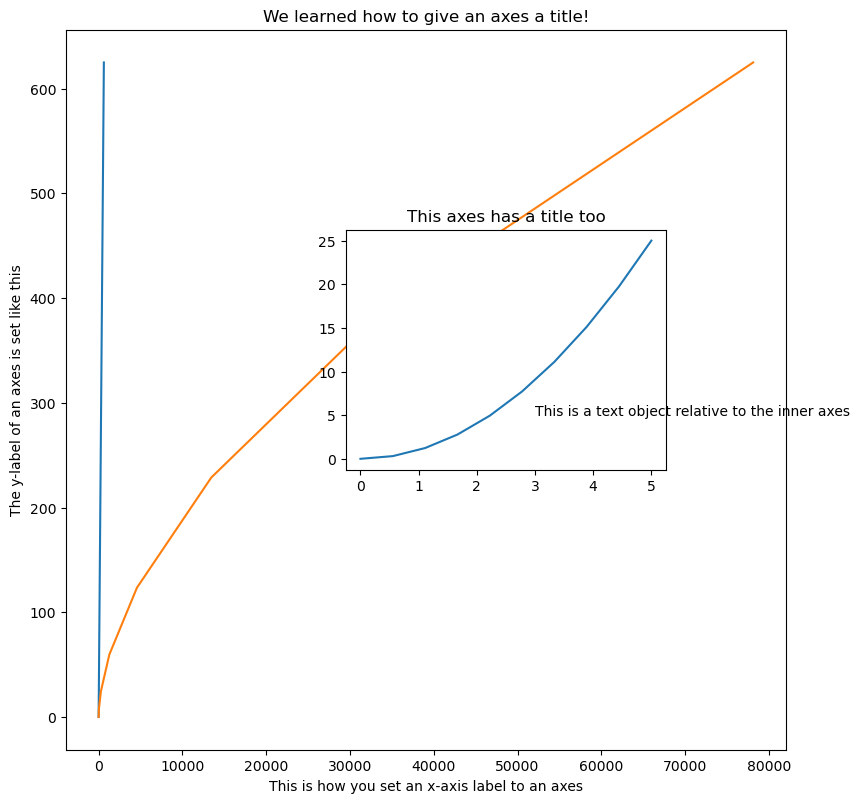

In [235]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

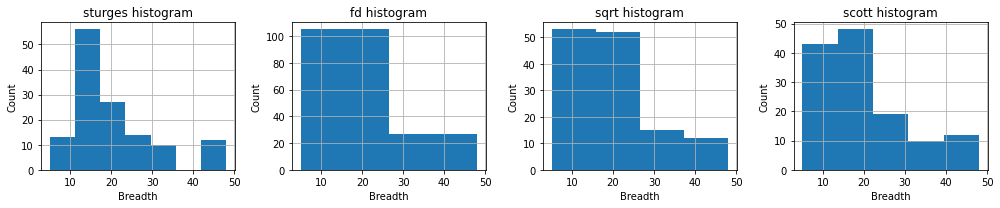

In [236]:
### Script here

i=1;
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(14,3))
for j in ['sturges','fd','sqrt','scott']:
        plt.subplot(1, 4, i)
        plt.title(str(j+" histogram"))
        plt.xlabel('Breadth')
        plt.ylabel('Count')
        result['Breadth'].hist(bins=np.histogram_bin_edges(result['Breadth'], bins=len(j)))
        i=i+1
fig.tight_layout()
plt.show()




<font color = red> \*** Answer here *** </font> In this exercise I have calculated the number of bins as the number of items in each type of histogram. Comparing the graphs, we can see that the fd, sqrt and scott histograms look very simmilar, the fd and sqrt ones being almost the same. The Breadth is a feasable attribute for classification because it gives us one of the most important information about the ships. However, in order to have a good classification it is not enough to have only this characteristic; we should take into consideration other aspects of the ships, such as the lenght (if we are making a classification by size)

**b)** Compare the distributions of the Breath variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

<AxesSubplot:xlabel='Breadth', ylabel='Density'>

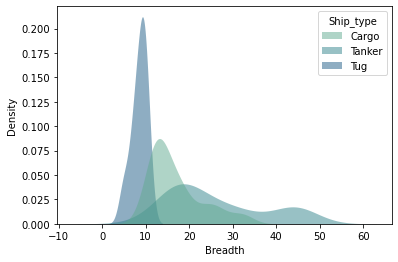

In [237]:
# Script here
sns.kdeplot(
   data=result, x="Breadth", hue="Ship_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
#make the plots and stack them together

<font color = red> \*** Answer here *** </font>
Looking at the distribution plot, we come to the same conclusion as in point a. Although Breadth is a good enough attribute  for classification in a general case, for our dataset Breadth is not enough on its own to make a classification. This is due to the fact that a lot of ships are placed in the same interval from the Breadth perspective, so we would need another attribute (or an aditional one) to make a good classification.

**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

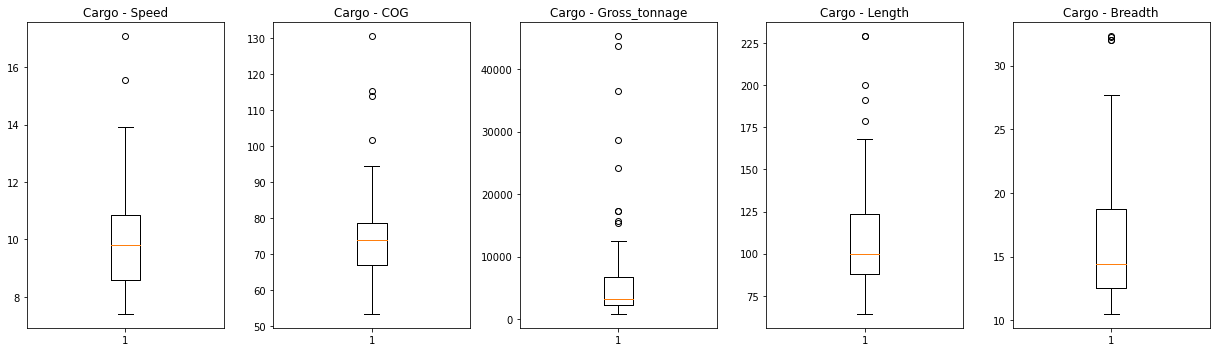

In [238]:
# Script here
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(17,5))
i=1
for j in ['Speed','COG',"Gross_tonnage",'Length','Breadth']:
    plt.subplot(1,5,i)
    plt.title(str("Cargo - "+ j))
    plt.boxplot((result[result["Ship_type"] == "Cargo"])[j])
    i=i+1
fig.tight_layout()
plt.show()

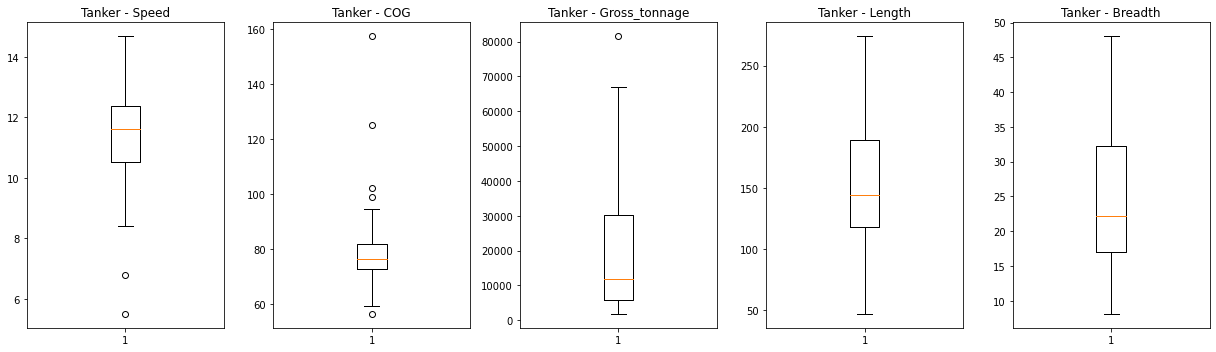

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(17,5))
i=1
for j in ['Speed','COG',"Gross_tonnage",'Length','Breadth']:
    plt.subplot(1,5,i)
    plt.title(str("Tanker - "+ j))
    plt.boxplot((result[result["Ship_type"] == "Tanker"])[j])
    i=i+1
fig.tight_layout()
plt.show()

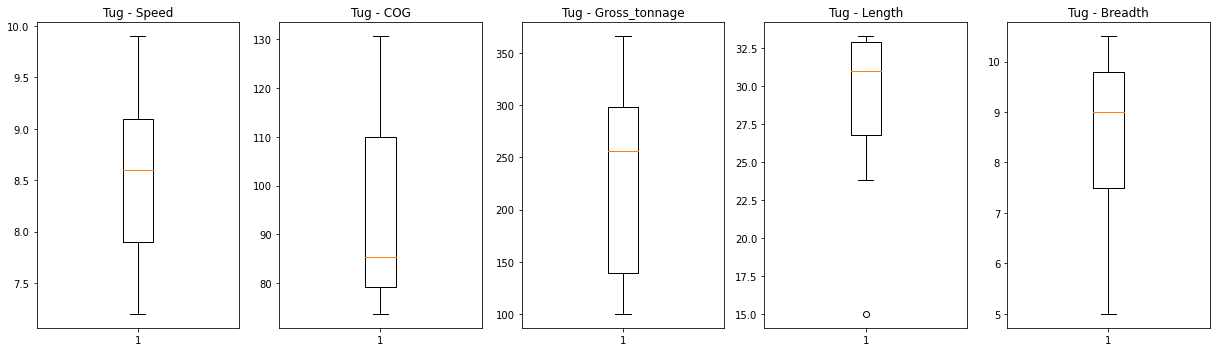

In [240]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(17,5))
i=1
for j in ['Speed','COG',"Gross_tonnage",'Length','Breadth']:
    plt.subplot(1,5,i)
    plt.title(str("Tug - "+ j))
    plt.boxplot((result[result["Ship_type"] == "Tug"])[j])
    i=i+1
fig.tight_layout()
plt.show()

<font color = red> \*** Answer here *** </font>
Boxplots are a visual measure of how well the data is distributed in the dataset. The outliers are data points that are different form the majority of all the other observations. Especially for the Cargo and Tanker types we have quite a few outliers. These bits of information may influence our analysis in a bad way, meaning that we might have plots with too much information that will make the analysis harder.

##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

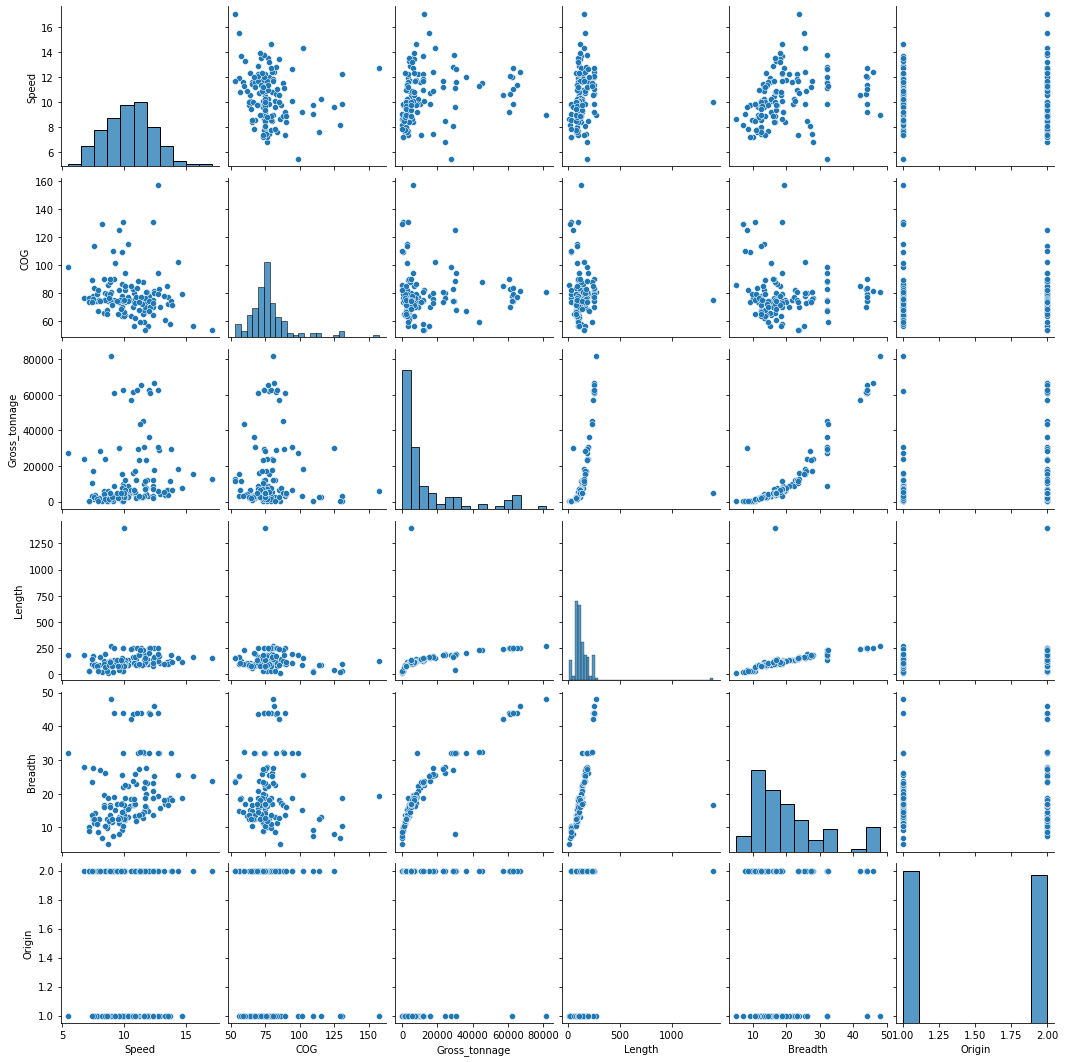

In [241]:
# Script here
sns.pairplot(data=result)


<font color = red> \*** Answer here *** </font>
<br> We can observe linear relationships between the length and breadth/ gross tonnage. We can also see an exponential or polynomial relationship between breadth and gross tonnage. Outliers are visible in quite a few plots as well: COG-length , speed-length and gross tonnage-length.

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

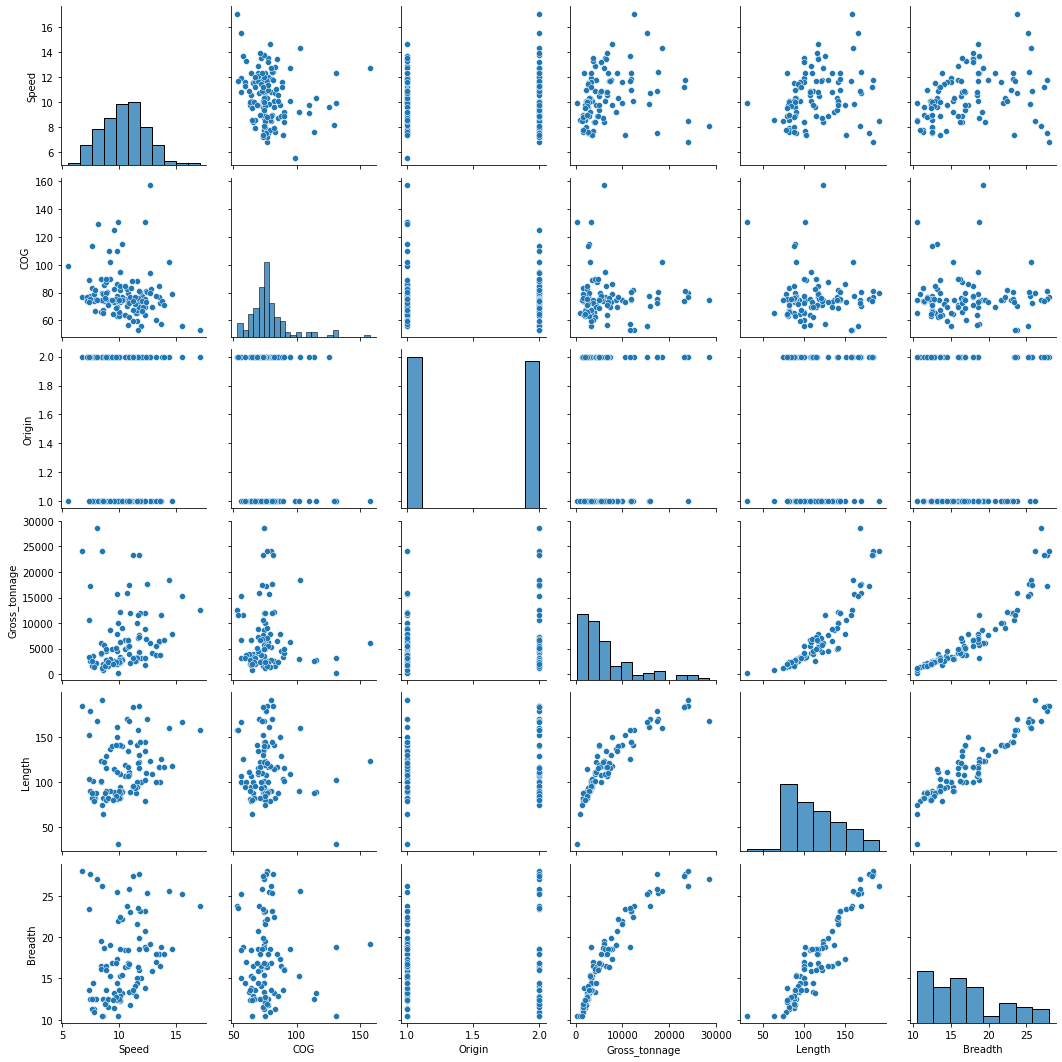

In [242]:
#Script here
import scipy.stats as stats

a = stats.zscore(result[['Gross_tonnage','Length','Breadth']])#using z-score method

abs_a = np.abs(a)
filtr = (abs_a < 1).all(axis=1)
res_nov = pd.concat([result.drop(columns=['Gross_tonnage','Length','Breadth']),
                    (result[['Gross_tonnage','Length','Breadth']])[filtr]],axis=1)
sns.pairplot(data=res_nov)


<font color = red> \*** Answer here *** </font>
With the removal of the outliers relationships mentioned in the previous point have a much clearer relationships, which look linear in some cases and exponential or polynomial in other.

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

<font color = red> \*** Answer here *** </font>

Pearson's correlation method is a method that assigns a values between − 1 and 1 for numerical variables (or elements that describe an object). − 1 means absolute negative correlation, 0 means no correlation, and 1 means absolute positive correlation. If we have a correlation value of -0.8 between these two elements would indicate that a significant negative relationship exists between the two. A negative correlation signifies that if the first variable goes up, then the second will also go down, and if the value of the correlation is higher than 0, then if the first increases so does the second.<br>
<br>
Spearman’s Rho is a coefficient used to understand the strength of the relationship between two variables. The variables of interest should be continuous or ordinal and should have a monotonic relationship. Continuous variables can take on any reasonable value, while ordinal variables are categories that have an inherent order. If the variables have a monotonic relationship then this means that when one variable goes up, the other goes up or when one variable goes up, the other goes down. <br><br>
Kendall’s Tau is a correlation coefficient which measures the relationship between two columns of ranked data. It is less used than Pearson's correlation and it uses the same concept as Spearman's Rho, however, Kendall's Tau is used to find relationships between columns of variables rather than analyse one pair of variables. This means that with this method we can find any number of intersections of data in two columns or concordant or discordant pairs of observations. Concordant pairs repersent positive relationships while discordant represent negative relationships. Kendall’s Tau has vallues between -1 and 1, and if it has a value smaller than 0 then we have more discordant pairs, if it's higher than 0 we have more concordant pairs, and if it's 0 then we have an equal number of concordant and discordant pairs.

**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

In [243]:
#Script here
nonclean = result.corr()
nonclean.style.background_gradient(cmap='coolwarm')
clean = res_nov.corr()
clean.style.background_gradient(cmap='coolwarm') #to see if the correlation works


,Speed,COG,Origin,Gross_tonnage,Length,Breadth
Speed,1.000000,-0.160593,-0.000073,0.172701,0.222728,0.303624
COG,-0.160593,1.000000,-0.033933,-0.043992,-0.081864,-0.019666
Origin,-0.000073,-0.033933,1.000000,0.181334,0.126356,0.115765
Gross_tonnage,0.172701,-0.043992,0.181334,1.000000,0.907338,0.929897
Length,0.222728,-0.081864,0.126356,0.907338,1.000000,0.937364
Breadth,0.303624,-0.019666,0.115765,0.929897,0.937364,1.000000


<AxesSubplot:title={'center':'Heatmap for original dataset'}>

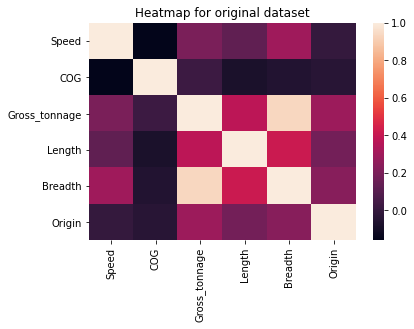

In [244]:
plt.title("Heatmap for original dataset")
sns.heatmap(nonclean)

<AxesSubplot:title={'center':'Heatmap for clean dataset'}>

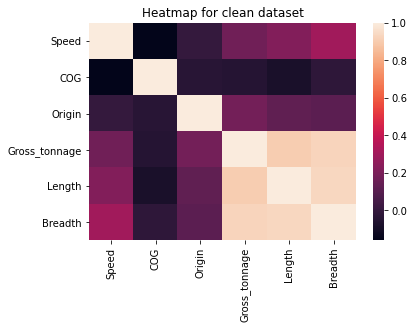

In [245]:
plt.title("Heatmap for clean dataset")
sns.heatmap(clean)

<font color = red> \*** Answer here *** </font>
The heatmap for the uncleaned dataset looks more random, with mild values mixed up with high values in the center of the heatmap (approximately). In the second heatmap (the one for the cleaned dataset), the values are more orderly and we can see that the values are more intense as we go towards the bottom-right corner.

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = red> \*** Answer here *** </font>

- **b)** Do it with and without z-score standardization. 

In [26]:
# Script: PCA with z-score standardization

In [27]:
# Script: PCA without z-score standardization

- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

In [28]:
# Script: Plot principal components

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

In [29]:
# Script: Explore variation

<font color = red> \*** Answer here *** </font>